In [9]:
%load_ext autoreload
%autoreload 2

from visiprog.metric_learn import lfda
import mlpy
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]  
data1 = np.random.multivariate_normal(mean1, cov1, 500)
Y1 = np.zeros((data1.shape[0],))

mean2 = [10, 0]
cov2 = [[1, 0], [0, 50]]  
data2 = np.random.multivariate_normal(mean2, cov2, 500)
Y2 = np.ones((data2.shape[0],))

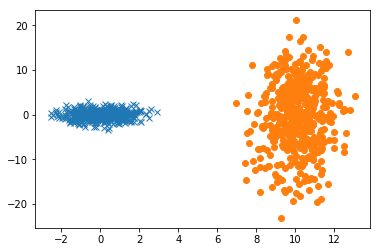

In [3]:
plt.plot(data1[:,0], data1[:,1], 'x')
plt.plot(data2[:,0], data2[:,1], 'o')

In [4]:
data = np.vstack([data1, data2])
Y = np.hstack([Y1, Y2]).astype(int)
print(data.shape)
print(Y.shape)

(1000, 2)
(1000,)


In [5]:
model = lfda.LFDA(k=2)
model.fit(data,Y)

/home/andrey/Dropbox/Hacking/Research/VisiProg2/analysis/thesis/visiprog/metric_learn/lfda.py:73: UserWarning: Chosen k (2) too large, using 1 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.' % (self.k,d-1))


LFDA(embedding_type='weighted', k=2, num_dims=None)

In [6]:
data1_transformed = model.transform(data1)
data2_transformed = model.transform(data2)

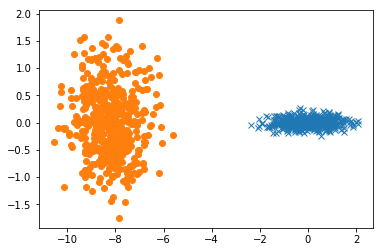

In [7]:
plt.plot(data1_transformed[:,0], data1_transformed[:,1], 'x')
plt.plot(data2_transformed[:,0], data2_transformed[:,1], 'o')

# Kernel LFDA

In [13]:
kernel_model = mlpy.KFDAC(lmb=0.001, kernel=mlpy.KernelGaussian(sigma=0.1))

In [14]:
kernel_model.learn(data, Y)